# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

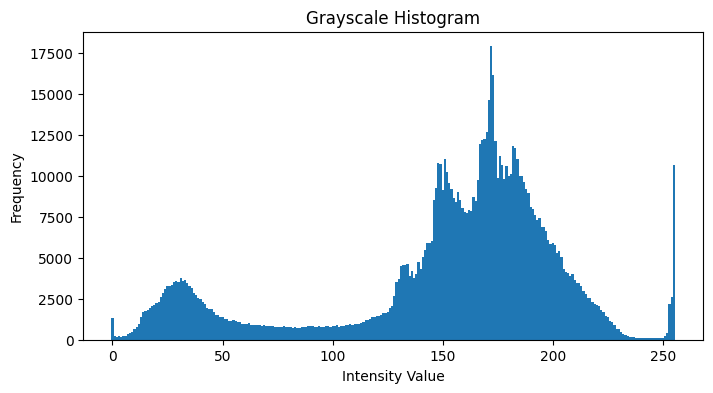

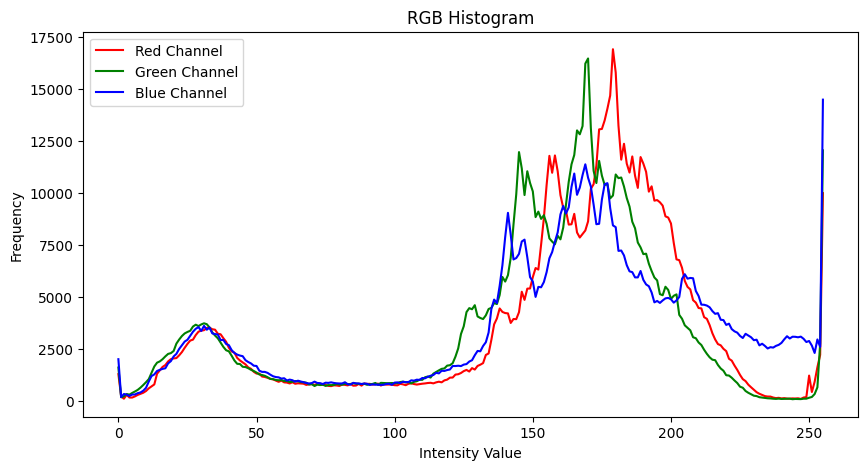

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Load and convert input image
img_bgr = cv2.imread("/content/drive/MyDrive/IMG-20251203-WA0062.jpg")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# Convert to grayscale
gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# 2. Function: Compute grayscale histogram manually
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=np.int64)

    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            value = gray_img[i, j]   # pixel intensity
            hist[value] += 1         # count frequency

    return hist

# Compute grayscale histogram
hist = gray_histogram(gray_img)

# Plot grayscale histogram
plt.figure(figsize=(8, 4))
plt.bar(np.arange(256), hist, width=1)
plt.title("Grayscale Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.show()

# 3. Function: Compute RGB histograms manually
def rgb_histogram(rgb_img):
    # Separate R, G, B channels
    R = rgb_img[:, :, 0]
    G = rgb_img[:, :, 1]
    B = rgb_img[:, :, 2]

    # Initialize histograms
    hist_r = np.zeros(256, dtype=np.int64)
    hist_g = np.zeros(256, dtype=np.int64)
    hist_b = np.zeros(256, dtype=np.int64)

    rows, cols, _ = rgb_img.shape

    for i in range(rows):
        for j in range(cols):
            hist_r[R[i, j]] += 1
            hist_g[G[i, j]] += 1
            hist_b[B[i, j]] += 1

    return hist_r, hist_g, hist_b

# Compute RGB histograms
hist_r, hist_g, hist_b = rgb_histogram(img_rgb)

# Plot RGB histograms
plt.figure(figsize=(10, 5))
plt.plot(hist_r, color='red', label='Red Channel')
plt.plot(hist_g, color='green', label='Green Channel')
plt.plot(hist_b, color='blue', label='Blue Channel')

plt.title("RGB Histogram")
plt.xlabel("Intensity Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

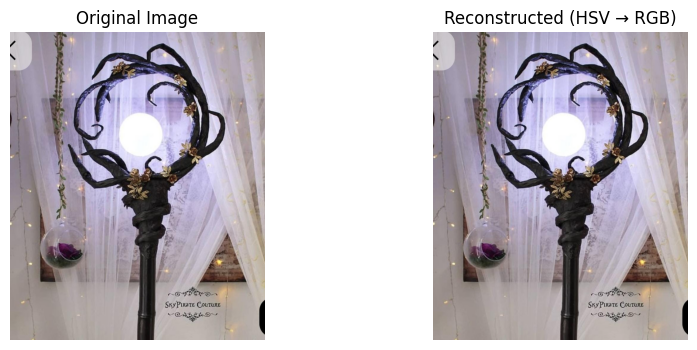

In [3]:
def rgb_to_hsv(rgb_img):
    # Convert image to float values between 0 and 1
    rgb = rgb_img.astype(np.float32) / 255.0
    r, g, b = rgb[..., 0], rgb[..., 1], rgb[..., 2]

    # Find the maximum, minimum, and difference of each pixel's RGB values
    Cmax = np.max(rgb, axis=-1)
    Cmin = np.min(rgb, axis=-1)
    delta = Cmax - Cmin

    # Create empty H, S, V channels
    H = np.zeros_like(Cmax)
    S = np.zeros_like(Cmax)
    V = Cmax.copy()       # Value = maximum of R, G, B

    # Hue calculation only when delta != 0 (otherwise color is gray)
    mask = delta != 0

    # If Red is the largest value
    mask_r = (Cmax == r) & mask
    H[mask_r] = (60 * ((g - b)[mask_r] / delta[mask_r])) % 360

    # If Green is the largest value
    mask_g = (Cmax == g) & mask
    H[mask_g] = 60 * (((b - r)[mask_g] / delta[mask_g]) + 2)

    # If Blue is the largest value
    mask_b = (Cmax == b) & mask
    H[mask_b] = 60 * (((r - g)[mask_b] / delta[mask_b]) + 4)

    # Saturation = delta / Cmax (when Cmax is not zero)
    S[Cmax != 0] = delta[Cmax != 0] / Cmax[Cmax != 0]
    S[Cmax == 0] = 0

    # Convert H, S, V to OpenCV-style ranges
    H = (H / 2).astype(np.uint8)       # OpenCV hue range: 0–179
    S = (S * 255).astype(np.uint8)     # 0–255
    V = (V * 255).astype(np.uint8)     # 0–255

    # Combine all three channels into one HSV image
    hsv = np.stack([H, S, V], axis=-1)
    return hsv


# Load image and test the manual conversion
img = cv2.imread("/content/drive/MyDrive/IMG-20251203-WA0062.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert using our function
hsv_np = rgb_to_hsv(img_rgb)

# Convert back to RGB using OpenCV to verify correctness
rgb_back = cv2.cvtColor(hsv_np, cv2.COLOR_HSV2RGB)

# Show original and reconstructed images
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(rgb_back)
plt.title("Reconstructed (HSV → RGB)")
plt.axis("off")

plt.show()

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

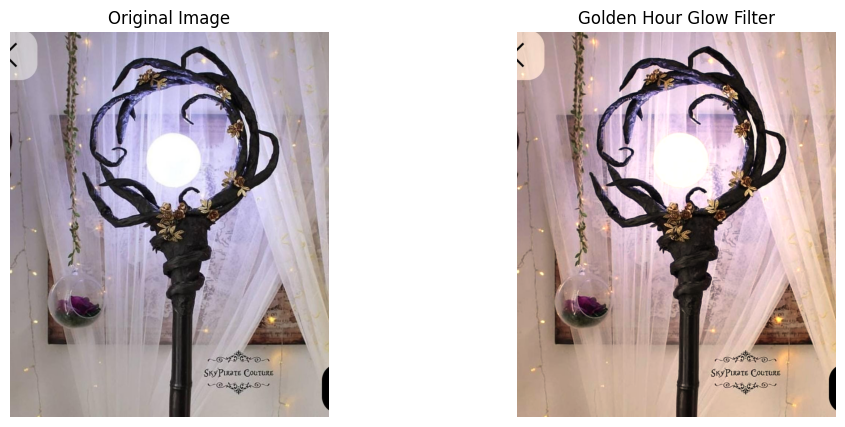

In [4]:
# Golden Hour Glow Filter
# This filter adds a warm tone by boosting red and green,
# and slightly brightens shadows using a gamma adjustment.

def golden_hour_glow(img_rgb):

    # Convert to float to safely modify pixel values
    img = img_rgb.astype(np.float32)

    # Add warm tones:
    # Increase Red slightly more than Green
    img[:, :, 0] *= 1.2   # Boost Red channel
    img[:, :, 1] *= 1.1   # Boost Green channel

    # Gamma correction (gamma > 1 brightens darker areas)
    gamma = 1.1
    img = 255 * ((img / 255) ** gamma)

    # Ensure values stay in the valid range (0–255)
    return np.clip(img, 0, 255).astype(np.uint8)


# Apply the filter
golden_img = golden_hour_glow(img_rgb)

# Show original and golden images
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(golden_img)
plt.title("Golden Hour Glow Filter")
plt.axis("off")

plt.show()

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

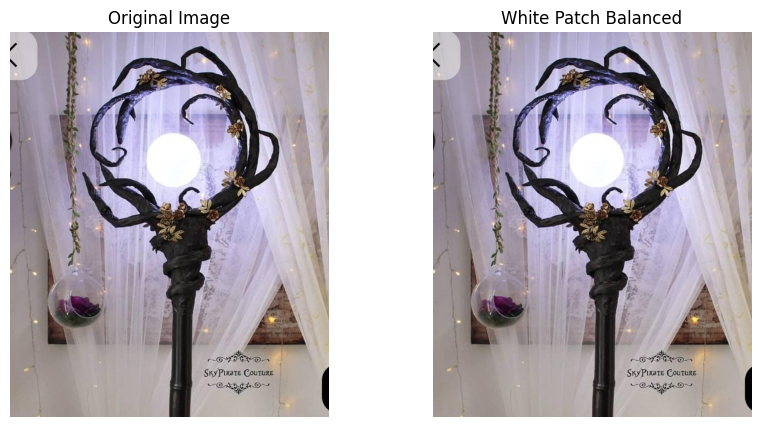

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# WHITE PATCH BALANCING
def white_patch_balance(img):
    # Make sure image has only R,G,B channels
    img = img[:, :, :3]

    # Convert to float so we can do math safely
    img_float = img.astype(np.float32)

    # Step 1: Find the brightest pixel value in each channel
    max_r = np.max(img_float[:, :, 0])
    max_g = np.max(img_float[:, :, 1])
    max_b = np.max(img_float[:, :, 2])

    # Step 2: Calculate how much each channel should be stretched
    # Goal: make the brightest value reach 255
    scale_r = 255 / max_r if max_r > 0 else 1
    scale_g = 255 / max_g if max_g > 0 else 1
    scale_b = 255 / max_b if max_b > 0 else 1

    # Step 3: Create a new image and apply the scaling
    new_img = np.zeros_like(img_float)
    new_img[:, :, 0] = img_float[:, :, 0] * scale_r
    new_img[:, :, 1] = img_float[:, :, 1] * scale_g
    new_img[:, :, 2] = img_float[:, :, 2] * scale_b

    # Step 4: Make sure values stay within 0–255 and convert back to uint8
    new_img = np.clip(new_img, 0, 255).astype(np.uint8)

    return new_img


# LOAD IMAGE
img = imread("/content/drive/MyDrive/IMG-20251203-WA0062.jpg")

# If image is 0–1 float, convert to 0–255 range
if img.dtype in [np.float32, np.float64]:
    img = (img * 255).astype(np.uint8)

# Apply white patch algorithm
balanced = white_patch_balance(img)

# SHOW IMAGES
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(balanced)
plt.title("White Patch Balanced")
plt.axis("off")

plt.show()

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

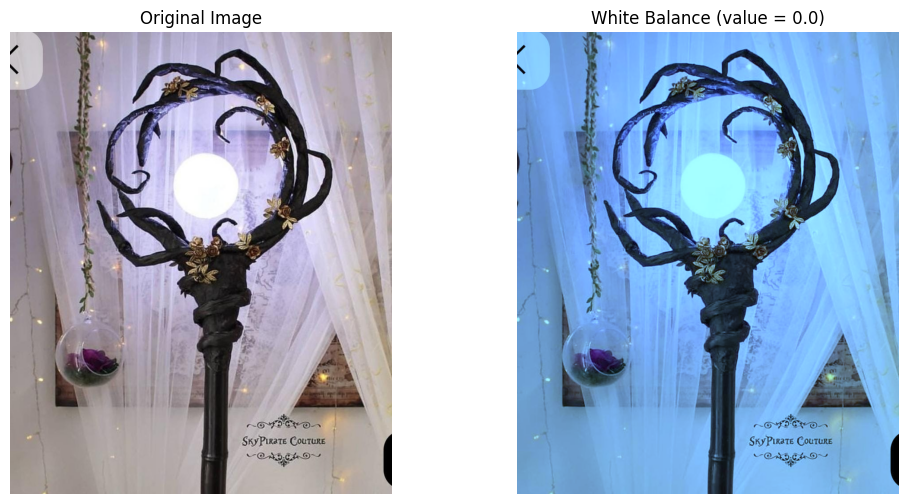

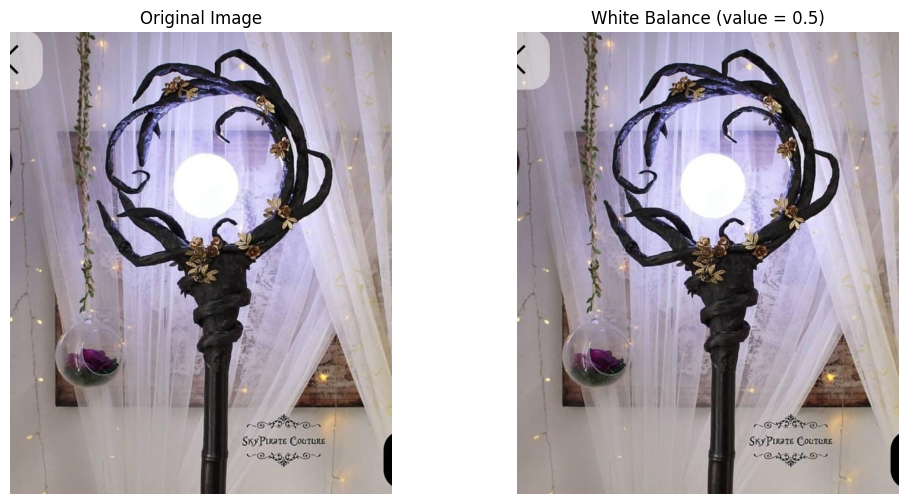

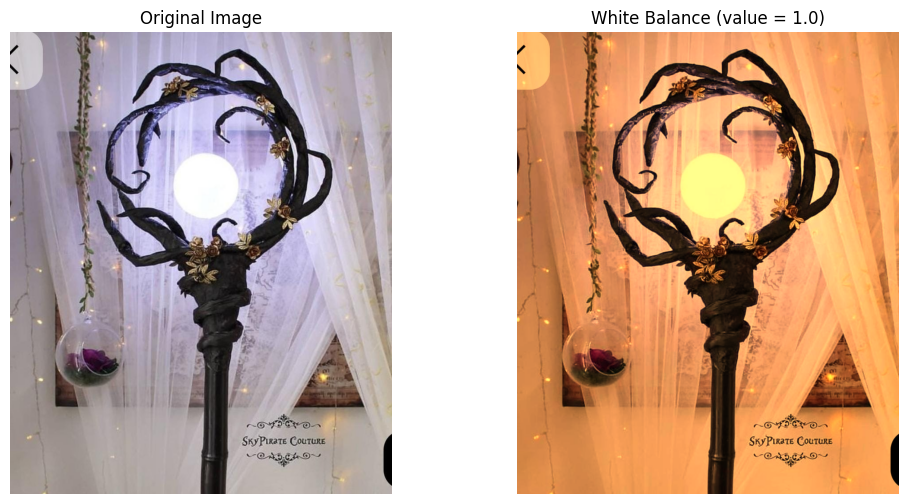

array([[[105, 186, 255],
        [106, 187, 255],
        [106, 187, 255],
        ...,
        [ 74, 135, 214],
        [ 74, 135, 214],
        [ 74, 135, 214]],

       [[105, 186, 255],
        [106, 187, 255],
        [106, 187, 255],
        ...,
        [ 74, 135, 214],
        [ 74, 135, 214],
        [ 74, 135, 214]],

       [[105, 186, 255],
        [106, 187, 255],
        [106, 187, 255],
        ...,
        [ 74, 135, 214],
        [ 74, 135, 214],
        [ 74, 135, 214]],

       ...,

       [[ 74, 137, 219],
        [ 74, 137, 219],
        [ 74, 137, 219],
        ...,
        [ 90, 164, 255],
        [ 90, 164, 255],
        [ 90, 164, 255]],

       [[ 74, 138, 221],
        [ 74, 138, 221],
        [ 74, 138, 221],
        ...,
        [ 90, 164, 255],
        [ 90, 164, 255],
        [ 90, 164, 255]],

       [[ 74, 137, 219],
        [ 74, 137, 219],
        [ 74, 138, 221],
        ...,
        [ 90, 165, 255],
        [ 90, 165, 255],
        [ 90, 165, 255]]

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def white_balance(img, value):
    """
    value = 0   -> cold (more blue)
    value = 0.5 -> normal
    value = 1   -> warm (more red)
    """

    # Convert image to float so we can safely modify values
    img = img.astype(np.float32)

    # Convert slider value to range -1 to +1
    # -1 means cold, +1 means warm
    t = (value - 0.5) * 2

    # How strong the warm/cold effect is
    strength = 0.4

    if t >= 0:
        # WARM EFFECT:
        # Increase Red   → R * (1 + something)
        # Decrease Blue  → B * (1 - something)
        img[:, :, 2] *= (1 + t * strength)   # Red channel
        img[:, :, 0] *= (1 - t * strength)   # Blue channel
    else:
        # COLD EFFECT:
        # Increase Blue, Decrease Red
        img[:, :, 0] *= (1 - t * strength)   # Blue channel (t negative → becomes +)
        img[:, :, 2] *= (1 + t * strength)   # Red channel

    # Small gamma correction for brightness/contrast adjustment
    gamma = 1 + 0.15 * t
    gamma = np.clip(gamma, 0.7, 1.3)

    img = 255 * ((img / 255) ** gamma)

    return np.clip(img, 0, 255).astype(np.uint8)


def show_white_balance(img, value):
    # Apply the white balance adjustment
    fixed_img = white_balance(img, value)

    # Show original vs processed image
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(fixed_img, cv2.COLOR_BGR2RGB))
    plt.title(f"White Balance (value = {value})")
    plt.axis("off")

    plt.show()

    return fixed_img


# Load image
img = cv2.imread("/content/drive/MyDrive/IMG-20251203-WA0062.jpg")

# Test different settings
show_white_balance(img, 0.0)   # Cold
show_white_balance(img, 0.5)   # Neutral
show_white_balance(img, 1.0)   # Warm